In [5]:
import sys
import os

module_path = os.path.abspath(os.path.join(os.pardir, os.pardir))
if module_path not in sys.path:
    sys.path.append(module_path)

In [6]:
import Preprocessing.preprocessing as pp
import numpy as np
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import pylab
import math
import Preprocessing.image_processing as ip
import sklearn.metrics as metrics
from sklearn import preprocessing

In [3]:
import tensorflow as tf
import keras as ks

Using TensorFlow backend.


# 96x96

Import the data

In [7]:
train_csv_x = '/Users/joelpersson/Documents/GitHub/CS229A/Data/train_images.csv'
train_csv_y = '/Users/joelpersson/Documents/GitHub//CS229A/Data/train_labels.csv'

X, Y = pp.load_XY(train_csv_x, train_csv_y)

Import the validation data

In [ ]:
val_csv_x = '/Users/joelpersson/Documents/GitHub/CS229A/Data/val_images.csv'
val_csv_y = '/Users/joelpersson/Documents/GitHub/CS229A/Data/val_labels.csv'

X_val, Y_val = pp.load_XY(val_csv_x, val_csv_y)

Build the neural net

In [693]:
# Define the neural network
def neural_net_binary(n_hidden_1, n_hidden_2, n_hidden_3):
    # Build the model
    model = ks.Sequential()
    # Normalize the input
    model.add(ks.layers.BatchNormalization())
    # Add hidden layers
    model.add(ks.layers.Dense(n_hidden_1, activation='sigmoid'))
#     model.add(ks.layers.Dense(n_hidden_2, activation='relu'))
#     model.add(ks.layers.Dense(n_hidden_3, activation='sigmoid'))
    # Add output node
    model.add(ks.layers.Dense(1, activation='sigmoid'))
    
    return model

Define the layer structure

In [694]:
out = neural_net_binary(128, 8, 8)

Define optimizer, loss and evaluation metric

In [690]:
out.compile(optimizer='adam', 
              loss='binary_crossentropy',
              metrics=['accuracy'])

Train the model

In [691]:
out.fit(X, Y, batch_size=32, epochs=5)

Epoch 1/5
6000/6000 [==============================] - 26s 4ms/step - loss: 0.5980 - acc: 0.6883
Epoch 2/5
6000/6000 [==============================] - 7s 1ms/step - loss: 0.5492 - acc: 0.7463
Epoch 3/5
6000/6000 [==============================] - 7s 1ms/step - loss: 0.5297 - acc: 0.7570
Epoch 4/5
6000/6000 [==============================] - 7s 1ms/step - loss: 0.5080 - acc: 0.7725
Epoch 5/5
6000/6000 [==============================] - 6s 1ms/step - loss: 0.4876 - acc: 0.7872


Evaluate the model on the training set

In [692]:
loss, acc = out.evaluate(X, Y)
proba = out.predict(X)
auc = metrics.roc_auc_score(Y, proba)

print('Training AUROC:', auc)
print('Training accuracy:', acc)

6000/6000 [==============================] - 9s 1ms/step
Training AUROC: 0.8805937993236665
Training accuracy: 0.825


Evaluate the model on the validation set

In [687]:
val_loss, val_acc = out.evaluate(X_val, Y_val)
val_proba = out.predict(X_val)
val_auc = metrics.roc_auc_score(Y_val, val_proba)

print('Validation AUROC:', val_auc)
print('Validation accuracy:', val_acc)

2000/2000 [==============================] - 3s 1ms/step
Validation AUROC: 0.7816660262814109
Validation accuracy: 0.7245


Network structures tested and their performance:

| Test | Auroc |Accuracy |#Epochs |#Layers | Activation 1 | Nodes 1 |Activation 2 | Nodes 2 |Activation 3 | Nodes 3| Notes
|--------------------|------|-------|---------|
| #1                 | 0.794  | 0.747 | 5    | 2    | Sigmoid   | 128   | Sigmoid   | 128    |
| #2                 | 0.787  | 0.741 | 5    | 2    | Sigmoid   | 128   | Sigmoid   | 64     |
| #3                 | 0.795  | 0.732 | 5    | 2    | Sigmoid   | 64    | Sigmoid   | 64     |
| #4                 | 0.768  | 0.719 | 5    | 2    | Sigmoid   | 256   | Sigmoid   | 64     |
| #5                 | 0.777  | 0.725 | 5    | 2    | Sigmoid   | 256   | Sigmoid   | 128    |
| #6                 | 0.785  | 0.734 | 5    | 2    | Sigmoid   | 32    | Sigmoid   | 16     |
| #7                 | 0.796  | 0.742 | 10   | 2    | Sigmoid   | 32    | Sigmoid   | 16     |
| #8                 | 0.759  | 0.713 | 30   | 2    | Sigmoid   | 32    | Sigmoid   | 16     |
| #9                 | 0.755  | 0.713 | 30   | 2    | Sigmoid   | 128   | Sigmoid   | 64     |
| #10                | 0.763  | 0.701 | 10   | 2    | Sigmoid   | 128   | Sigmoid   | 64     |
| #11                | 0.772  | 0.707 | 10   | 2    | Sigmoid   | 64    | Sigmoid   | 64     |
| #12                | 0.787  | 0.731 | 5    | 2    | Sigmoid   | 16    | Sigmoid   | 16     | Sigmoid   | 16    
| #13                | 0.794  | 0.742 | 10   | 2    | Sigmoid   | 16    | Sigmoid   | 16     | Sigmoid   | 16    
| #14                | 0.794  | 0.730 | 30   | 2    | Sigmoid   | 16    | Sigmoid   | 16     | Sigmoid   | 16    
| #15                | 0.788  | 0.722 | 5    | 2    | Sigmoid   | 32    | Sigmoid   | 16     | Sigmoid   | 8    
| #16                | 0.779  | 0.733 | 5    | 2    | Relu      | 16    | Relu      | 16     | Sigmoid   | 16   
| #17                | 0.794  | 0.732 | 5    | 2    | Relu      | 16    | Relu      | 8      | Sigmoid   | 8   
| #18                | 0.749  | 0.721 | 10   | 2    | Relu      | 16    | Relu      | 8      | Sigmoid   | 8   
| #19                | 0.761  | 0.723 | 5    | 2    | Relu      | 16    | Relu      | 8      | Sigmoid   | 4   
| #20                | 0.768  | 0.724 | 5    | 2    | Relu      | 64    | Relu      | 64     | Sigmoid   | 64 
| #21                | 0.714  | 0.681 | 15   | 2    | Relu      | 64    | Relu      | 64     | Sigmoid   | 64 
| #22                | 0.766  | 0.732 | 5    | 2    | Relu      | 64    | Relu      | 32     | Sigmoid   | 32 
| #23                | 0.791  | 0.733 | 5    | 2    | Relu      | 64    | Relu      | 32     | Sigmoid   | 16 
| #24                | 0.780  | 0.732 | 10   | 2    | Relu      | 64    | Relu      | 32     | Sigmoid   | 16 
| #25                | 0.780  | 0.739 | 5    | 2    | Sigmoid   | 4     | | | | | Reg: 0.0001
| #26                | 0.786  | 0.727 | 5    | 2    | Sigmoid   | 8     | | | | | Reg: 0.0001
| #27                | 0.794  | 0.733 | 5    | 2    | Sigmoid   | 16    | | | | | Reg: 0.0001
| #28                | 0.785  | 0.731 | 5    | 2    | Sigmoid   | 32    | | | | | Reg: 0.0001
| #29                | 0.789  | 0.722 | 5    | 2    | Sigmoid   | 64    | | | | | Reg: 0.0001
| #30                | 0.798  | 0.737 | 5    | 2    | Sigmoid   | 128   | | | | | Reg: 0.0001
| #31                | 0.779  | 0.716 | 5    | 2    | Sigmoid   | 256   | | | | | Reg: 0.0001
| #32                | 0.768  | 0.686 | 5    | 2    | Sigmoid   | 4     | | | | | Reg: 0.01
| #33                | 0.778  | 0.735 | 5    | 2    | Sigmoid   | 8     | | | | | Reg: 0.01
| #34                | 0.785  | 0.732 | 5    | 2    | Sigmoid   | 16    | | | | | Reg: 0.01
| #35                | 0.762  | 0.719 | 5    | 2    | Sigmoid   | 32    | | | | | Reg: 0.01
| #36                | 0.775  | 0.708 | 5    | 2    | Sigmoid   | 64    | | | | | Reg: 0.01
| #37                | 0.746  | 0.701 | 5    | 2    | Sigmoid   | 128   | | | | | Reg: 0.01
| #38                | 0.769  | 0.729 | 5    | 2    | Sigmoid   | 256   | | | | | Reg: 0.01
| #39                | 0.751  | 0.706 | 10   | 2    | Sigmoid   | 4     | | | | | Reg: 0.01
| #40                | 0.767  | 0.718 | 10   | 2    | Sigmoid   | 8     | | | | | Reg: 0.01
| #41                | 0.768  | 0.688 | 10   | 2    | Sigmoid   | 16    | | | | | Reg: 0.01
| #42                | 0.765  | 0.717 | 10   | 2    | Sigmoid   | 32    | | | | | Reg: 0.01
| #43                | 0.772  | 0.703 | 10   | 2    | Sigmoid   | 64    | | | | | Reg: 0.01
| #44                | 0.754  | 0.724 | 10   | 2    | Sigmoid   | 128   | | | | | Reg: 0.01
| #45                | 0.773  | 0.718 | 10   | 2    | Sigmoid   | 256   | | | | | Reg: 0.01

# 32x32
Start by cropping out the center

In [317]:
n = 32
X_32 = np.zeros((X.shape[0], n*n*3))
X_val_32 = np.zeros((X_val.shape[0], n*n*3))

for i in range(X.shape[0]):
    X_32[i] = ip.crop_center(X[i,:], (96,96,3), 32)

for j in range(X_val.shape[0]):
    X_val_32[j] = ip.crop_center(X_val[j,:], (96,96,3), 32)

Define the neural network structure

In [641]:
# Define the neural network
def neural_net_binary_32(n_hidden_1, n_hidden_2, n_hidden_3):
    # Build the model
    model = ks.Sequential()
    # Normalize the input
    model.add(ks.layers.BatchNormalization())
    # Add hidden layers
    model.add(ks.layers.Dense(n_hidden_1, activation='selu', kernel_regularizer=ks.regularizers.l2(0.0003)))
    model.add(ks.layers.Dense(n_hidden_2, activation='sigmoid', kernel_regularizer=ks.regularizers.l2(0.0001)))
#     model.add(ks.layers.Dense(n_hidden_3, activation='tanh'))
    # Add output node
    model.add(ks.layers.Dense(1, activation='sigmoid'))
    
    return model

In [642]:
out_32 = neural_net_binary_32(64, 16, 32)

out_32.compile(optimizer='adam', 
              loss='binary_crossentropy',
              metrics=['accuracy'])

out_32.fit(X_32, Y, batch_size=32, epochs=5)

Epoch 1/5
6000/6000 [==============================] - 11s 2ms/step - loss: 0.6566 - acc: 0.6762
Epoch 2/5
6000/6000 [==============================] - 2s 280us/step - loss: 0.5947 - acc: 0.7248
Epoch 3/5
6000/6000 [==============================] - 2s 282us/step - loss: 0.5666 - acc: 0.7482
Epoch 4/5
6000/6000 [==============================] - 2s 289us/step - loss: 0.5430 - acc: 0.7660
Epoch 5/5
6000/6000 [==============================] - 2s 285us/step - loss: 0.5210 - acc: 0.7895


In [643]:
val_32_loss, val_32_acc = out_32.evaluate(X_val_32, Y_val)
val_32_proba = out_32.predict(X_val_32)
val_32_auc = metrics.roc_auc_score(Y_val, val_32_proba)

print('Validation AUROC:', val_32_auc)
print('Validation accuracy:', val_32_acc)

2000/2000 [==============================] - 4s 2ms/step
Validation AUROC: 0.7790056097748407
Validation accuracy: 0.719


## Error Analysis

In [ ]:
out = neural_net_binary(128, 8, 8)

In [695]:
auc_train = []
auc_val = []
for i in range(200,X.shape[0]+201, 200):
    out_ea = neural_net_binary(128, 8, 8)
    out_ea.compile(optimizer='adam', 
              loss='binary_crossentropy',
              metrics=['accuracy'])
    out_ea.fit(X[:i], Y[:i], batch_size=32, epochs=5)
    
    proba = out_ea.predict(X[:i])
    auc_train.append(metrics.roc_auc_score(Y[:i], proba))
    
    val_proba = out_ea.predict(X_val)
    auc_val.append(metrics.roc_auc_score(Y_val, val_proba))

Epoch 1/5
200/200 [==============================] - 16s 78ms/step - loss: 1.2595 - acc: 0.4550
Epoch 2/5
200/200 [==============================] - 0s 2ms/step - loss: 0.7319 - acc: 0.6650
Epoch 3/5
200/200 [==============================] - 0s 2ms/step - loss: 0.5353 - acc: 0.6350
Epoch 4/5
200/200 [==============================] - 0s 2ms/step - loss: 0.4707 - acc: 0.7650
Epoch 5/5
200/200 [==============================] - 0s 2ms/step - loss: 0.4292 - acc: 0.8100
Epoch 1/5
400/400 [==============================] - 12s 31ms/step - loss: 2.4844 - acc: 0.4975
Epoch 2/5
400/400 [==============================] - 1s 2ms/step - loss: 1.0485 - acc: 0.5425
Epoch 3/5
400/400 [==============================] - 1s 2ms/step - loss: 0.6203 - acc: 0.6975
Epoch 4/5
400/400 [==============================] - 1s 2ms/step - loss: 0.5412 - acc: 0.7400
Epoch 5/5
400/400 [==============================] - 1s 2ms/step - loss: 0.5098 - acc: 0.7750
Epoch 1/5
600/600 [==============================] - 13s

3600/3600 [==============================] - 23s 6ms/step - loss: 0.6739 - acc: 0.6497
Epoch 2/5
3600/3600 [==============================] - 8s 2ms/step - loss: 0.5472 - acc: 0.7325
Epoch 3/5
3600/3600 [==============================] - 8s 2ms/step - loss: 0.5030 - acc: 0.7644
Epoch 4/5
3600/3600 [==============================] - 7s 2ms/step - loss: 0.4648 - acc: 0.7922
Epoch 5/5
3600/3600 [==============================] - 7s 2ms/step - loss: 0.4414 - acc: 0.8058
Epoch 1/5
3800/3800 [==============================] - 20s 5ms/step - loss: 1.4149 - acc: 0.5621
Epoch 2/5
3800/3800 [==============================] - 8s 2ms/step - loss: 0.5968 - acc: 0.6992
Epoch 3/5
3800/3800 [==============================] - 9s 2ms/step - loss: 0.5455 - acc: 0.7439
Epoch 4/5
3800/3800 [==============================] - 8s 2ms/step - loss: 0.5109 - acc: 0.7629
Epoch 5/5
3800/3800 [==============================] - 8s 2ms/step - loss: 0.4898 - acc: 0.7787
Epoch 1/5
4000/4000 [===========================

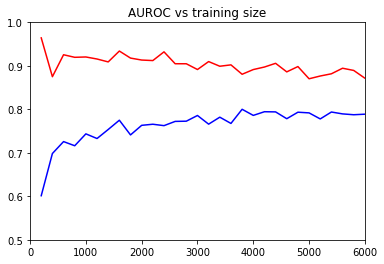

In [697]:
training_sizes = np.arange(200,X.shape[0]+201, 200)

plt.title('AUROC vs training size')
plt.plot(training_sizes, np.array(auc_train),'r')
plt.plot(training_sizes, np.array(auc_val), 'b')
plt.axis([0,6000, 0.5, 1.0])
plt.show()